# Cycle fluxes in receptor models



## <span style='color:#ffeb3b'>UNDER CONSTRUCTION</span>



In [1]:
%%capture
%run receptor_tools.ipynb

As discusssed earlier [earlier](markov_chain_tree_theorem_intro), the [Markov chain tree theorem](https://en.wikipedia.org/wiki/Markov_chain_tree_theorem) (also called Hill's diagrammatic method) provides algebraic expressions for the steady-state probabilities of a receptor model.    The function `hill_diagramatic_method()` below takes a symbolic generator matrix for such a Markov chain as input and, using the Markov chain tree theorem, calculates the steady-state probability of each state.

The receptor models considered here have state\-transition diagrams with the topology of a simple symmetric directed graph (connected, no loops). The Markov chain tree theorem always applies to receptor models with these properties.  However, there are Markov chains that can not be analyzed in this way (e.g., Markov chains with an infinite number of states).

## Receptor model with topology of the House Graph 

Consider receptor model that has more than one cycle, namely, the [house graph](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generators/basic.html#sage.graphs.generators.basic.HouseGraph).

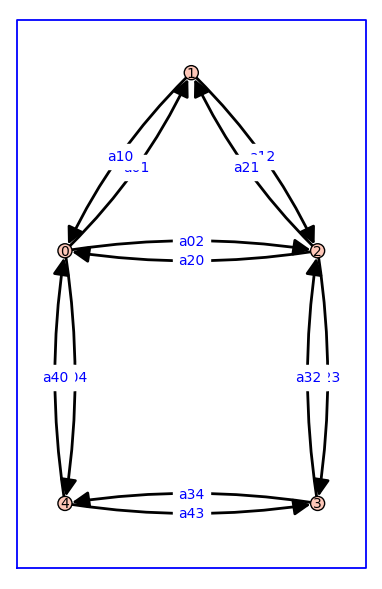

In [2]:
var('p0 p1 p2 p3 p4 a01 a10 a02 a20 a04 a40 a12 a21 a23 a32 a34 a43')
d = {0: {1:a01, 2:a02, 4:a04}, 1: {0:a10, 2:a12}, 2: {1:a21, 0:a20, 3:a23}, 3: {2:a32, 4:a34}, 4: {3:a43, 0:a40}};
G = DiGraph(d,weighted=True)
vertex_positions = {0: (0, 0), 1: (1, 1.41), 2: (2, 0), 3: (2,-2), 4: (0,-2)}
G.plot(figsize=8,edge_labels=True,pos=vertex_positions,graph_border=True)

In [3]:
Q = generator(G.weighted_adjacency_matrix(sparse=False))

In [4]:
z = hill_diagramatic_method(Q)
for i in range(5):
    print('z[%s] ='%i, f'{expand(z[i])}')

z[0] = a10*a20*a32*a40 + a12*a20*a32*a40 + a10*a21*a32*a40 + a10*a20*a34*a40 + a12*a20*a34*a40 + a10*a21*a34*a40 + a10*a23*a34*a40 + a12*a23*a34*a40 + a10*a20*a32*a43 + a12*a20*a32*a43 + a10*a21*a32*a43
z[1] = a01*a20*a32*a40 + a01*a21*a32*a40 + a02*a21*a32*a40 + a01*a20*a34*a40 + a01*a21*a34*a40 + a02*a21*a34*a40 + a01*a23*a34*a40 + a01*a20*a32*a43 + a01*a21*a32*a43 + a02*a21*a32*a43 + a04*a21*a32*a43
z[2] = a02*a10*a32*a40 + a01*a12*a32*a40 + a02*a12*a32*a40 + a02*a10*a34*a40 + a01*a12*a34*a40 + a02*a12*a34*a40 + a02*a10*a32*a43 + a04*a10*a32*a43 + a01*a12*a32*a43 + a02*a12*a32*a43 + a04*a12*a32*a43
z[3] = a02*a10*a23*a40 + a01*a12*a23*a40 + a02*a12*a23*a40 + a04*a10*a20*a43 + a04*a12*a20*a43 + a04*a10*a21*a43 + a02*a10*a23*a43 + a04*a10*a23*a43 + a01*a12*a23*a43 + a02*a12*a23*a43 + a04*a12*a23*a43
z[4] = a04*a10*a20*a32 + a04*a12*a20*a32 + a04*a10*a21*a32 + a04*a10*a20*a34 + a04*a12*a20*a34 + a04*a10*a21*a34 + a02*a10*a23*a34 + a04*a10*a23*a34 + a01*a12*a23*a34 + a02*a12*a23*a34 + a

In this case, each of the five relative probabilities is a multinomial with 10 terms because there are 10 rooted spanning trees associated to each state (vertex).  Each term has 4 factors because any spanning tree of the house graph has 4 edges.

In [5]:
def myHouseGraph():
    H = DiGraph()
    vertex_vars = ['a0','a1','a2','a3','a4']
    edge_vars = ['a','b','c','d','e','f','A','B','C','D','E','F']
    V=PolynomialRing(ZZ,names=vertex_vars,order='invlex')
    V.inject_variables()
    E=PolynomialRing(ZZ,names=edge_vars,order='lex')
    E.inject_variables()
    H.add_edge(a0,a1,E.gen(edge_vars.index('a')))
    H.add_edge(a1,a0,E.gen(edge_vars.index('A')))
    H.add_edge(a0,a2,E.gen(edge_vars.index('c')))
    H.add_edge(a2,a0,E.gen(edge_vars.index('C')))
    H.add_edge(a0,a4,E.gen(edge_vars.index('f')))
    H.add_edge(a4,a0,E.gen(edge_vars.index('F')))
    H.add_edge(a1,a2,E.gen(edge_vars.index('b')))
    H.add_edge(a2,a1,E.gen(edge_vars.index('B')))
    H.add_edge(a2,a3,E.gen(edge_vars.index('d')))
    H.add_edge(a3,a2,E.gen(edge_vars.index('D')))
    H.add_edge(a3,a4,E.gen(edge_vars.index('e')))
    H.add_edge(a4,a3,E.gen(edge_vars.index('E')))
    return H, E

Defining a0, a1, a2, a3, a4
Defining a, b, c, d, e, f, A, B, C, D, E, F


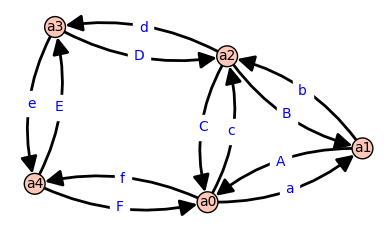

In [6]:
H, P = myHouseGraph()
H.show(edge_labels=True,layout='spring')

In [7]:
def tree_polynomial(G,P=None,root=None):
    if P==None:
        edge_vars = []
        f = 0
        #edge_coeff = []
        for e in G.edges(sort=True):
            f += e[2]
            #print(e,e[2].monomials()[0],list(e[2].monomials()[0]))
        print(f.variables())
        edge_vars = list(f.variables()) 
        #    edge_coeff.append(e[2]/e[2].monomials()[0])
        P = PolynomialRing(ZZ,names=edge_vars)
    Trees = []
    if G.is_directed():
        if root != None:
            T = P(0)
            for b in G.in_branchings(source=root,spanning=True):
                t = P(1)
                for e in b.edges(sort=True):
                    t *= P(e[2])
                T += t
            return T  
        else:  
            for r in G.vertices(sort=True):
                #print('r=',r)
                T = P(0)
                for b in G.in_branchings(source=r,spanning=True):
                    #b.show(figsize=10,edge_labels=true)
                    t = P(1)
                    for e in b.edges(sort=True):
                        #print(e)
                        #t *= P(e[2].monomials()[0])
                        t *= P(e[2])
                    T += t
                Trees.append(T)
                #return Trees
            return Trees
    else:
        T = 0
        for b in G.spanning_trees():
            t = 1
            for e in b.edges(sort=True):
                t *= G.edge_label(e[0],e[1])
            T += t
        return P(T) 

In [8]:
TT = tree_polynomial(H,P)

In [9]:
T = tree_polynomial(H,P,a0)
show(T)

b*d*e*F + b*e*C*F + b*C*D*E + b*C*D*F + d*e*A*F + e*A*B*F + e*A*C*F + A*B*D*E + A*B*D*F + A*C*D*E + A*C*D*F

In [10]:
for v in H.vertices(sort=True):
    T = tree_polynomial(H,P,v)
    print(v,':',T)

a0 : b*d*e*F + b*e*C*F + b*C*D*E + b*C*D*F + d*e*A*F + e*A*B*F + e*A*C*F + A*B*D*E + A*B*D*F + A*C*D*E + A*C*D*F
a1 : a*d*e*F + a*e*B*F + a*e*C*F + a*B*D*E + a*B*D*F + a*C*D*E + a*C*D*F + c*e*B*F + c*B*D*E + c*B*D*F + f*B*D*E
a2 : a*b*e*F + a*b*D*E + a*b*D*F + b*c*e*F + b*c*D*E + b*c*D*F + b*f*D*E + c*e*A*F + c*A*D*E + c*A*D*F + f*A*D*E
a3 : a*b*d*E + a*b*d*F + b*c*d*E + b*c*d*F + b*d*f*E + b*f*C*E + c*d*A*E + c*d*A*F + d*f*A*E + f*A*B*E + f*A*C*E
a4 : a*b*d*e + b*c*d*e + b*d*e*f + b*e*f*C + b*f*C*D + c*d*e*A + d*e*f*A + e*f*A*B + e*f*A*C + f*A*B*D + f*A*C*D


In [11]:
def cycle_fluxes(G,P,verbose=True):
    Cvert3 = []  
    Cvert2 = [] 
    for C in G.all_simple_cycles():
        if len(C) > 3:
            Cvert3.append(C)
        else:
            Cvert2.append(C)
    Cvert2.sort()
    Cvert3Sort = Cvert3.copy()
    Cvert3Sort.sort()
    Cvert3SortP = Cvert3Sort.copy()
    for i in range(len(Cvert3Sort)/2):
        Cvert3SortP.remove(Cvert3SortP[i][::-1])
    Cvert3SortP2 = []
    for i in range(3,100): # arbitrary max cycle length 
        Cvert3SortP2 += [ C for C in Cvert3SortP if len(C)==i ]
    Cvert3SortP = Cvert3SortP2.copy()
    Cvert3SortM = []
    for i in range(len(Cvert3SortP)):  
        Cvert3SortM.append(Cvert3SortP[i][::-1])
    CvertP = Cvert3SortP + Cvert2
    CvertM = Cvert3SortM + Cvert2
    ncycles = len(CvertP)

    CedgeP = []
    CedgeM = []
    ThetaP = []
    ThetaM = []
    for i in range(ncycles):
        CPe = [ G.edge_label(CvertP[i][j],CvertP[i][j+1]) for j in range(len(CvertP[i])-1)]
        CMe = [ G.edge_label(CvertM[i][j],CvertM[i][j+1]) for j in range(len(CvertM[i])-1)]
        TPe = prod(CPe)
        TMe = prod(CMe)
        CedgeP.append(CPe)
        ThetaP.append(TPe)
        CedgeM.append(CMe)
        ThetaM.append(TMe)

    Tkappa = []
    ThetaPMTkappa = []
    for i in range(ncycles):
        CP=CvertP[i]
        #print('CP=',CP)
        H = G.copy()
        #show(H,edge_labels=True) ######
        H.allow_multiple_edges(True)
        #print([None]+CP)
        H.merge_vertices([None]+CP) # None becomes vertex 0 (as opposed to a0, a1, ...)
        if H.order():
            #show(H,edge_labels=True) ######
            T = tree_polynomial(H,P,root=0) 
        else:
            T = P(1)
        Tkappa.append(T)
        ThetaPMTkappa.append((ThetaP[i]-ThetaM[i])*Tkappa[i])

    if verbose:
        print('\ntotal of',len(Cvert2),'+ 2 *',len(Cvert3)/2,'cycles.\n') 
        for i in range(ncycles):
            H = G.copy()
            for e in H.edges(sort=True):
                H.set_edge_label(e[0],e[1],0)
            for j in range(len(CvertP[i])-1):
                H.set_edge_label(CvertP[i][j],CvertP[i][j+1],1)
                H.set_edge_label(CvertM[i][j],CvertM[i][j+1],-1)
            if ThetaP[i] == ThetaM[i]: 
                print(i,'=>',CvertP[i],'-',CvertM[i],'=>',CedgeP[i],'-',CedgeM[i],'=>',ThetaP[i]-ThetaM[i],'@ (',Tkappa[i],')')
            else:
                print(i,'=>',CvertP[i],'-',CvertM[i],'=>',CedgeP[i],'-',CedgeM[i],'=>',(ThetaP[i]-ThetaM[i]).factor(),'@ (',Tkappa[i],')')
            H.show(color_by_label=True,edge_labels=True)
            
    return ncycles, CedgeP, CedgeM, ThetaP, ThetaM, Tkappa, ThetaPMTkappa

In [12]:
Trees = tree_polynomial(H)
T = [0]*len(Trees)
for i in range(len(Trees)):
    T[i] = Trees[i]
    print('T[%s] = ' %(i),T[i])
TT = sum(T)

(a, b, c, d, e, f, A, B, C, D, E, F)
T[0] =  A*B*D*E + b*C*D*E + A*C*D*E + b*d*e*F + d*e*A*F + e*A*B*F + b*e*C*F + e*A*C*F + A*B*D*F + b*C*D*F + A*C*D*F
T[1] =  a*B*D*E + c*B*D*E + f*B*D*E + a*C*D*E + a*d*e*F + a*e*B*F + c*e*B*F + a*e*C*F + a*B*D*F + c*B*D*F + a*C*D*F
T[2] =  a*b*D*E + b*c*D*E + b*f*D*E + c*A*D*E + f*A*D*E + a*b*e*F + b*c*e*F + c*e*A*F + a*b*D*F + b*c*D*F + c*A*D*F
T[3] =  a*b*d*E + b*c*d*E + b*d*f*E + c*d*A*E + d*f*A*E + f*A*B*E + b*f*C*E + f*A*C*E + a*b*d*F + b*c*d*F + c*d*A*F
T[4] =  a*b*d*e + b*c*d*e + b*d*e*f + c*d*e*A + d*e*f*A + e*f*A*B + b*e*f*C + e*f*A*C + f*A*B*D + b*f*C*D + f*A*C*D



total of 6 + 2 * 3 cycles.

0 => [a0, a1, a2, a0] - [a0, a2, a1, a0] => [a, b, C] - [c, B, A] => (-1) * (-a*b*C + c*A*B) @ ( e*F + D*E + D*F )


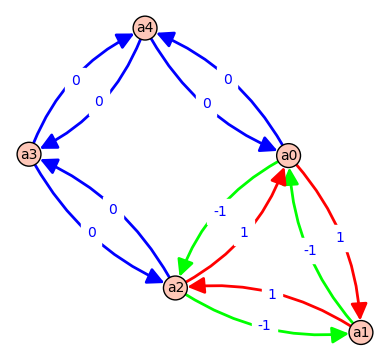

1 => [a0, a2, a3, a4, a0] - [a0, a4, a3, a2, a0] => [c, d, e, F] - [f, E, D, C] => (-1) * (-c*d*e*F + f*C*D*E) @ ( b + A )


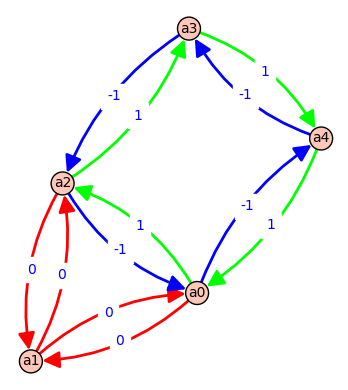

2 => [a0, a1, a2, a3, a4, a0] - [a0, a4, a3, a2, a1, a0] => [a, b, d, e, F] - [f, E, D, B, A] => (-1) * (-a*b*d*e*F + f*A*B*D*E) @ ( 1 )


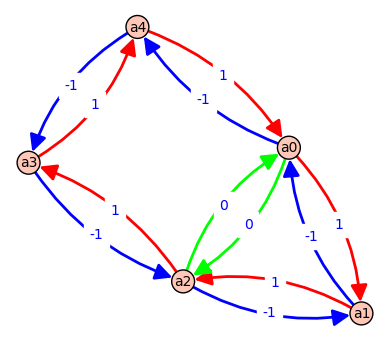

3 => [a0, a1, a0] - [a0, a1, a0] => [a, A] - [a, A] => 0 @ ( d*e*F + e*B*F + e*C*F + B*D*E + B*D*F + C*D*E + C*D*F )


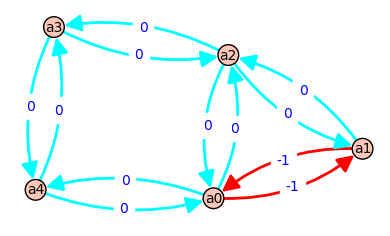

4 => [a0, a2, a0] - [a0, a2, a0] => [c, C] - [c, C] => 0 @ ( b*e*F + b*D*E + b*D*F + e*A*F + A*D*E + A*D*F )


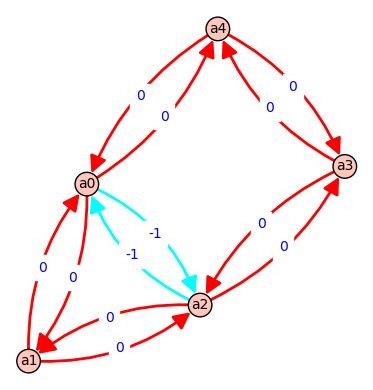

5 => [a0, a4, a0] - [a0, a4, a0] => [f, F] - [f, F] => 0 @ ( b*d*e + b*e*C + b*C*D + d*e*A + e*A*B + e*A*C + A*B*D + A*C*D )


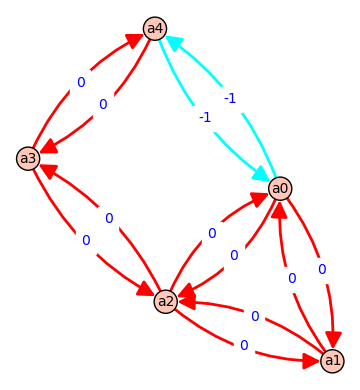

6 => [a1, a2, a1] - [a1, a2, a1] => [b, B] - [b, B] => 0 @ ( a*e*F + a*D*E + a*D*F + c*e*F + c*D*E + c*D*F + f*D*E )


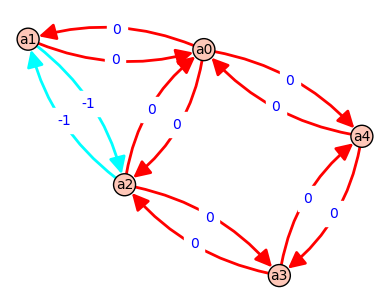

7 => [a2, a3, a2] - [a2, a3, a2] => [d, D] - [d, D] => 0 @ ( a*b*E + a*b*F + b*c*E + b*c*F + b*f*E + c*A*E + c*A*F + f*A*E )


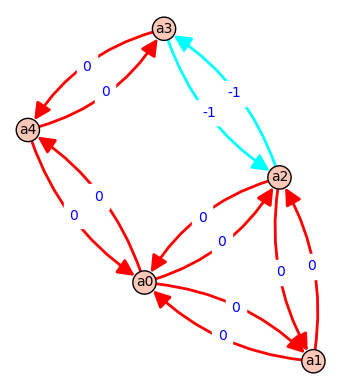

8 => [a3, a4, a3] - [a3, a4, a3] => [e, E] - [e, E] => 0 @ ( a*b*d + b*c*d + b*d*f + b*f*C + c*d*A + d*f*A + f*A*B + f*A*C )


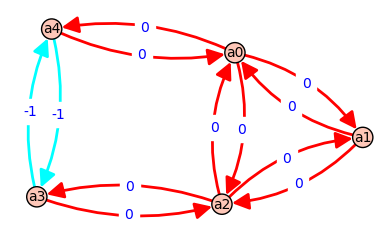

( a*b*C - c*A*B ) @ ( e*F + D*E + D*F )
( c*d*e*F - f*C*D*E ) @ ( b + A )
( a*b*d*e*F - f*A*B*D*E ) @ ( 1 )
( a*A - a*A ) @ ( d*e*F + e*B*F + e*C*F + B*D*E + B*D*F + C*D*E + C*D*F )
( c*C - c*C ) @ ( b*e*F + b*D*E + b*D*F + e*A*F + A*D*E + A*D*F )
( f*F - f*F ) @ ( b*d*e + b*e*C + b*C*D + d*e*A + e*A*B + e*A*C + A*B*D + A*C*D )
( b*B - b*B ) @ ( a*e*F + a*D*E + a*D*F + c*e*F + c*D*E + c*D*F + f*D*E )
( d*D - d*D ) @ ( a*b*E + a*b*F + b*c*E + b*c*F + b*f*E + c*A*E + c*A*F + f*A*E )
( e*E - e*E ) @ ( a*b*d + b*c*d + b*d*f + b*f*C + c*d*A + d*f*A + f*A*B + f*A*C )


In [13]:
ncycles, CedgeP, CedgeM, ThetaP, ThetaM, Tkappa, ThetaPMTkappa = cycle_fluxes(H,P,verbose=True)
for i in range(ncycles):
    print('(',ThetaP[i],'-',ThetaM[i],') @ (',Tkappa[i],')')